 - AWS의 RDS ,OliveYoung데이터 베이스에 연결 

In [7]:
import mysql.connector 
oliveyoung_base= mysql.connector.connect(
    host = "database-1.cls80ok4wdvh.ap-northeast-2.rds.amazonaws.com",
    port = 3306 ,
    user = "root",
    password = "19990611",
     database = "OliveYoung"
)

In [8]:
cursor = oliveyoung_base.cursor() 

- 데이터 베이스의 데이터를 데이터 프레임으로 변환 

In [25]:
cursor.execute("SELECT* FROM cream" )
result = cursor.fetchall()

crema_df = pd.DataFrame(result)
crema_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,토리든,토리든 다이브인 수딩크림 100ml 더블 한정 기획,42000,27930,10707,4.8,32,50,18,65,35,1,79,21,1,"정제수,부틸렌글라이콜,글리세린,1,2-헥산다이올,하이드로제네이티드다이데센,알란토인,..."
1,에스네이처,에스네이처 아쿠아 스쿠알란 수분크림 60ml 더블 어워즈 한정기획,43000,23500,15902,4.8,36,53,11,79,19,2,78,22,1,"정제수,스쿠알란,글리세린,1,2-헥산다이올,베타인,판테놀,소듐하이알루로네이트,하이드..."
2,라로슈포제,라로슈포제 NEW 시카플라스트 밤B5+ 100ml 기획,39000,33150,12588,4.8,46,49,5,46,52,2,72,26,2,정제수하이드로제네이티드폴리아이소부텐다이메티콘글리세린시어버터판테놀옥수수전분프로판다이올...
3,피지오겔,피지오겔 DMT 페이셜 크림 200ml 대용량 한정기획,47500,29900,5931,4.8,52,44,4,75,25,0,73,27,0,"정제수,카프릴릭/카프릭트리글리세라이드,글리세린,펜틸렌글라이콜,코코넛오일,하이드로제네..."
4,헤브블루,헤브블루 살몬 케어링 센텔라 크림 100ml,39900,22900,571,5.0,30,60,10,44,56,1,93,7,1,"병풀추출물,부틸렌글라이콜,글리세린,카프릴릭/카프릭트라이글리세라이드,하이드로제네이티드..."


In [26]:
sql = "desc cream"
colum_name_list = []
for col in cursor.execute(sql,multi=True):
    if col.with_rows:
        colum= col.fetchall()
        print(colum)
    else:
        print(col.statement)

for colum_name in colum : 
    colum_name= colum_name[0]
    colum_name_list.append(colum_name)


print(colum_name_list)

[('브랜드명', 'text', 'YES', '', None, ''), ('제품명', 'text', 'YES', '', None, ''), ('원가', 'bigint', 'YES', '', None, ''), ('세일가', 'bigint', 'YES', '', None, ''), ('평점 갯수', 'bigint', 'YES', '', None, ''), ('평점', 'double', 'YES', '', None, ''), ('건성', 'bigint', 'YES', '', None, ''), ('복합성', 'bigint', 'YES', '', None, ''), ('지성', 'bigint', 'YES', '', None, ''), ('보습', 'bigint', 'YES', '', None, ''), ('진정', 'bigint', 'YES', '', None, ''), ('주름/미백', 'bigint', 'YES', '', None, ''), ('자극x', 'bigint', 'YES', '', None, ''), ('보통', 'bigint', 'YES', '', None, ''), ('자극O', 'bigint', 'YES', '', None, ''), ('성분', 'text', 'YES', '', None, '')]
['브랜드명', '제품명', '원가', '세일가', '평점 갯수', '평점', '건성', '복합성', '지성', '보습', '진정', '주름/미백', '자극x', '보통', '자극O', '성분']


In [27]:
crema_df.columns = colum_name_list
cream_df.head()

,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
0,토리든,토리든 다이브인 수딩크림 100ml 더블 한정 기획,42000,27930,10707,4.8,32,50,18,65,35,1,79,21,1,"정제수,부틸렌글라이콜,글리세린,1,2-헥산다이올,하이드로제네이티드다이데센,알란토인,..."
1,에스네이처,에스네이처 아쿠아 스쿠알란 수분크림 60ml 더블 어워즈 한정기획,43000,23500,15902,4.8,36,53,11,79,19,2,78,22,1,"정제수,스쿠알란,글리세린,1,2-헥산다이올,베타인,판테놀,소듐하이알루로네이트,하이드..."
2,라로슈포제,라로슈포제 NEW 시카플라스트 밤B5+ 100ml 기획,39000,33150,12588,4.8,46,49,5,46,52,2,72,26,2,정제수하이드로제네이티드폴리아이소부텐다이메티콘글리세린시어버터판테놀옥수수전분프로판다이올...
3,피지오겔,피지오겔 DMT 페이셜 크림 200ml 대용량 한정기획,47500,29900,5931,4.8,52,44,4,75,25,0,73,27,0,"정제수,카프릴릭/카프릭트리글리세라이드,글리세린,펜틸렌글라이콜,코코넛오일,하이드로제네..."
4,헤브블루,헤브블루 살몬 케어링 센텔라 크림 100ml,39900,22900,571,5.0,30,60,10,44,56,1,93,7,1,"병풀추출물,부틸렌글라이콜,글리세린,카프릴릭/카프릭트라이글리세라이드,하이드로제네이티드..."


In [28]:
cream_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   브랜드명    551 non-null    object 
 1   제품명     551 non-null    object 
 2   원가      551 non-null    int64  
 3   세일가     551 non-null    int64  
 4   평점 갯수   551 non-null    int64  
 5   평점      551 non-null    float64
 6   건성      551 non-null    int64  
 7   복합성     551 non-null    int64  
 8   지성      551 non-null    int64  
 9   보습      551 non-null    int64  
 10  진정      551 non-null    int64  
 11  주름/미백   551 non-null    int64  
 12  자극x     551 non-null    int64  
 13  보통      551 non-null    int64  
 14  자극O     551 non-null    int64  
 15  성분      551 non-null    object 
dtypes: float64(1), int64(12), object(3)
memory usage: 69.0+ KB


In [29]:

cursor.execute("SELECT* FROM lotion" )
result = cursor.fetchall()

lotion_df = pd.DataFrame(result)
lotion_df.head()

sql = "desc lotion"
colum_name_list = []
for col in cursor.execute(sql,multi=True):
    if col.with_rows:
        colum= col.fetchall()
        print(colum)
    else:
        print(col.statement)

for colum_name in colum : 
    colum_name= colum_name[0]
    colum_name_list.append(colum_name)


print(colum_name_list)

lotion_df.columns = colum_name_list
lotion_df.head()

[('브랜드명', 'text', 'YES', '', None, ''), ('제품명', 'text', 'YES', '', None, ''), ('원가', 'bigint', 'YES', '', None, ''), ('세일가', 'bigint', 'YES', '', None, ''), ('평점 갯수', 'bigint', 'YES', '', None, ''), ('평점', 'double', 'YES', '', None, ''), ('건성', 'bigint', 'YES', '', None, ''), ('복합성', 'bigint', 'YES', '', None, ''), ('지성', 'bigint', 'YES', '', None, ''), ('보습', 'bigint', 'YES', '', None, ''), ('진정', 'bigint', 'YES', '', None, ''), ('주름/미백', 'bigint', 'YES', '', None, ''), ('자극x', 'bigint', 'YES', '', None, ''), ('보통', 'bigint', 'YES', '', None, ''), ('자극O', 'bigint', 'YES', '', None, ''), ('성분', 'text', 'YES', '', None, '')]
['브랜드명', '제품명', '원가', '세일가', '평점 갯수', '평점', '건성', '복합성', '지성', '보습', '진정', '주름/미백', '자극x', '보통', '자극O', '성분']


,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
0,아이디얼포맨,아이디얼 포 맨 퍼펙트 올인원 어워즈 한정 기획,29000,20900,3255,4.9,26,67,7,66,30,4,65,35,1,"정제수,글리세린,메틸트라이메티콘,메틸프로판다이올,에틸헥실스테아레이트,에탄올,1,2-..."
1,아이디얼포맨,아이디얼 포 맨 프레시 올인원 기획,28000,22400,1416,4.8,14,33,53,52,48,0,71,29,0,"정제수,메틸프로판다이올,다이프로필렌글라이콜,1,2-헥산다이올,나이아신아마이드,아이소..."
2,닥터지,닥터지 레드 블레미쉬 포 맨 올인원,29700,26600,1584,4.8,28,60,13,51,47,2,75,25,0,"정제수,프로판다이올,부틸렌글라이콜다이카프릴레이트/다이카프레이트,메틸프로판다이올,트라..."
3,아누아,아누아 어성초 70 데일리 로션 200ml,28000,21900,839,4.8,22,62,16,41,59,1,75,23,2,"약모밀추출물,글리세린,1,2-헥산다이올,메틸트라이메티콘,에틸헥실스테아레이트,부틸렌글..."
4,라운드랩,라운드랩 1025 독도 로션 400ml 대용량,39000,25600,7998,4.8,27,61,12,65,35,1,76,22,2,"정제수,글리세린,퀸즈랜드넛오일,1,2-헥산다이올,펜틸렌글라이콜,아이리쉬모스추출물,사..."


In [30]:

cursor.execute("SELECT* FROM essence" )
result = cursor.fetchall()

essence_df = pd.DataFrame(result)
essence_df.head()

sql = "desc essence"
colum_name_list = []
for col in cursor.execute(sql,multi=True):
    if col.with_rows:
        colum= col.fetchall()
        print(colum)
    else:
        print(col.statement)

for colum_name in colum : 
    colum_name= colum_name[0]
    colum_name_list.append(colum_name)


print(colum_name_list)

essence_df.columns = colum_name_list
essence_df.head()

[('브랜드명', 'text', 'YES', '', None, ''), ('제품명', 'text', 'YES', '', None, ''), ('원가', 'bigint', 'YES', '', None, ''), ('세일가', 'bigint', 'YES', '', None, ''), ('평점 갯수', 'bigint', 'YES', '', None, ''), ('평점', 'double', 'YES', '', None, ''), ('건성', 'bigint', 'YES', '', None, ''), ('복합성', 'bigint', 'YES', '', None, ''), ('지성', 'bigint', 'YES', '', None, ''), ('보습', 'bigint', 'YES', '', None, ''), ('진정', 'bigint', 'YES', '', None, ''), ('주름/미백', 'bigint', 'YES', '', None, ''), ('자극x', 'bigint', 'YES', '', None, ''), ('보통', 'bigint', 'YES', '', None, ''), ('자극O', 'bigint', 'YES', '', None, ''), ('성분', 'text', 'YES', '', None, '')]
['브랜드명', '제품명', '원가', '세일가', '평점 갯수', '평점', '건성', '복합성', '지성', '보습', '진정', '주름/미백', '자극x', '보통', '자극O', '성분']


,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
0,VT,VT 리들샷 100 에센스 50ml,32000,28800,8039,4.7,20,65,15,22,41,37,13,31,56,"정제수,다이프로필렌글라이콜,글리세린,나이아신아마이드,부틸렌글라이콜,마카다미아씨오일,..."
1,구달,구달 청귤 비타C 잡티케어 세럼 30ml 트리플기획,56000,30900,18746,4.8,30,61,9,27,28,45,59,39,3,"탄제린추출물,부틸렌글라이콜,나이아신아마이드,다이프로필렌글라이콜,메틸글루세스-20,정..."
2,토리든,토리든 다이브인 저분자 히알루론산 세럼 50ml 리필기획,36000,23750,26123,4.8,41,48,11,75,25,1,81,19,1,"정제수,부틸렌글라이콜,글리세린,다이프로필렌글라이콜,1,2-헥산다이올,판테놀,소듐하이..."
3,넘버즈인,넘버즈인 3번 보들보들 결 세럼 80ml 기획,34000,23800,18311,4.7,31,59,10,52,31,17,57,37,7,"비피다발효용해물,갈락토미세스발효여과물,부틸렌글라이콜,메틸글루세스-20,정제수,나이아..."
4,웰라쥬,웰라쥬 리얼 히알루로닉 블루 100 앰플 100ml+75ml 기획,53000,31900,4039,4.9,39,49,12,71,29,1,78,22,0,"'정제수,프로판다이올,펜틸렌글라이콜,글리세린,1,2-헥산다이올,판테놀,참마뿌리추출물..."


- 이미 거의 다 했지만 편의를 위해 데이터 베이스의 데이터를 데이터프레임으로 만드는 함수 작성 

In [10]:
import pandas as pd

def base_to_df(table_name):
    # 테이블에서 데이터 가져오기
    cursor.execute(f"SELECT * FROM {table_name}")
    result = cursor.fetchall()

    # 컬럼 이름 가져오기
    cursor.execute(f"DESC {table_name}")
    column_info = cursor.fetchall()
    column_names = [col[0] for col in column_info]

    # DataFrame 생성 및 컬럼 이름 설정
    df = pd.DataFrame(result, columns=column_names)
    
    return df

# 사용 예:
# lotion_df = base_to_df('lotion')
# 이와 같이 사용하여 결과를 원하는 변수에 직접 할당할 수 있습니다.


In [144]:
skin_df =base_to_df('skin')

In [11]:
lotion_df = base_to_df('lotion')

- 앞서 lotion 데이터 크롤링 코드에서 작성했었던 성분의 빈도를 비교하는 함수

In [12]:
def frequent_ingredients(df, column, threshold_percentage, value=(0, float('inf')),price_range=(0, float('inf'))):
    # 해당 조건을 만족하는 제품들
    min_price, max_price = price_range
    min_value, max_value = value
    products = df[(df[column] >= min_value)&(df[column] <= max_value) &(df["원가"] >= min_price) & (df["원가"] <= max_price)]

    # 조건을 만족하는 제품의 수
    products_count = products.shape[0]

    print(f"조건을 만족하는 제품의 수: {products_count}")
    
    # 성분을 분리하여 explode
    df_exploded = products['성분'].str.split(',').explode()

    # 성분별 빈도 계산
    ingredient_counts = df_exploded.value_counts()

    # 결과를 데이터프레임으로 변환
    ingredient_counts_df = ingredient_counts.reset_index()
    ingredient_counts_df.columns = ['성분', '빈도']

    # products_count의 특정 비율 이상인 성분만 필터링 적은 빈도의 성분을 필터링 하기 위함 
    frequency_threshold = products_count * threshold_percentage / 100
    frequent_ingredients_df = ingredient_counts_df[ingredient_counts_df['빈도'] >= frequency_threshold]
    
    
    # 제외하고 싶은 성분 목록
    exclude_ingredients = [
    "향료","1", "정제수","카보머", "스테아릭애씨드", "스테아릴알코올", "다이소듐이디티에이",
    "페녹시에탄올", "폴리솔베이트60", "베헤닐알코올", 
    "2-헥산다이올", "팔미틱애씨드", "하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸타우레이트코폴리머", "세테아릴알코올", "프로판다이올", "글리세릴스테아레이트",
    "에탄올", "아크릴레이트/C10-30알킬아크릴레이트크로스폴리머",
    "암모늄아크릴로일다이메틸타우레이트/브이피코폴리머", "소듐하이드록사이드",
    "리모넨", "소듐스테아로일글루타메이트", "폴리글리세릴-10스테아레이트"
    ]
    
    


    # 'a'에서 제외하고 싶은 성분을 제거
    filtered_frequent_ingredients_df = frequent_ingredients_df[~frequent_ingredients_df['성분'].isin(exclude_ingredients)]
    filtered_frequent_ingredients_df = filtered_frequent_ingredients_df.reset_index(drop=True)
    filtered_frequent_ingredients_df
    

    return filtered_frequent_ingredients_df



- 로션 제품중에 건성에 좋음값이 50 이상인 제품에 대한 성분 빈도 출력 

In [13]:
lotion_dry_skin = frequent_ingredients(lotion_df,'건성',10, (50,float('inf')))

lotion_dry_skin

조건을 만족하는 제품의 수: 21


,성분,빈도
0,글리세린,20
1,부틸렌글라이콜,19
2,소듐하이알루로네이트,13
3,토코페롤,12
4,트로메타민,12
...,...,...
74,폴리글리세릴-3메틸글루코오스다이스테아레이트,3
75,만니톨,3
76,쉐어버터,3
77,세테아릴올리베이트,3


- 0~35000원 사이에 로션 제품중에 건성에 좋음값이 50 이상인 제품에 대한 성분 빈도 출력 

In [14]:
lotion_dry_skin_0_to_35000 = frequent_ingredients(lotion_df,'건성',10,(50,float('inf')),(0,35000))

lotion_dry_skin_0_to_35000

조건을 만족하는 제품의 수: 10


,성분,빈도
0,글리세린,10
1,부틸렌글라이콜,9
2,펜틸렌글라이콜,8
3,소듐하이알루로네이트,8
4,하이드로제네이티드레시틴,6
...,...,...
160,해바라기싹추출물,1
161,브루셀스프라우트추출물,1
162,브로콜리싹추출물,1
163,포도주추출물,1


- 35000원 이상에 로션 제품중에 건성에 좋음값이 50 이상인 제품에 대한 성분 빈도 출력 

In [15]:
lotion_dry_skin_up_to_35000 = frequent_ingredients(lotion_df,'건성',10,(50,float('inf')),(35000,float('inf')))

lotion_dry_skin_up_to_35000

조건을 만족하는 제품의 수: 13


,성분,빈도
0,부틸렌글라이콜,12
1,글리세린,12
2,에틸헥실글리세린,9
3,토코페롤,9
4,트로메타민,8
...,...,...
134,마카다미아씨오일,2
135,메도우폼씨오일,2
136,소나무잎추출물,2
137,글리세릴스테아레이트에스이,2


In [35]:
# 두 데이터 프레임의 차이점 확인
common = pd.merge(lotion_dry_skin_0_to_35000, lotion_dry_skin_up_to_35000, on='성분', how='inner', suffixes=('_0_to_35000', '_up_to_35000'))
unique_to_0_to_35000 = pd.merge(lotion_dry_skin_0_to_35000, lotion_dry_skin_up_to_35000, on='성분', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
unique_to_up_to_35000 = pd.merge(lotion_dry_skin_0_to_35000, lotion_dry_skin_up_to_35000, on='성분', how='right', indicator=True).query('_merge == "right_only"').drop('_merge', axis=1)

common


,성분,빈도_0_to_35000,빈도_up_to_35000
0,글리세린,10,12
1,부틸렌글라이콜,9,12
2,펜틸렌글라이콜,8,4
3,소듐하이알루로네이트,8,5
4,하이드로제네이티드레시틴,6,5
...,...,...,...
72,소듐아세틸레이티드하이알루로네이트,1,2
73,하이드롤라이즈드하이알루로닉애씨드,1,2
74,만니톨,1,2
75,스위트아몬드오일,1,2


In [36]:
unique_to_0_to_35000



,성분,빈도_x,빈도_y
14,알란토인,4,NaN
15,알지닌,4,NaN
18,팔미토일펜타펩타이드-4,3,NaN
19,비닐다이메티콘,3,NaN
20,폴리글리세릴-3다이스테아레이트,3,NaN
...,...,...,...
158,아보카도오일,1,NaN
160,해바라기싹추출물,1,NaN
161,브루셀스프라우트추출물,1,NaN
162,브로콜리싹추출물,1,NaN


In [37]:
unique_to_up_to_35000

,성분,빈도_x,빈도_y
9,글리세릴카프릴레이트,NaN,6
11,솔비탄아이소스테아레이트,NaN,5
13,카페인,NaN,5
19,폴리아크릴레이트-13,NaN,4
23,폴리실리콘-11,NaN,4
...,...,...,...
132,소듐하이알루로네이트크로스폴리머,NaN,2
133,하이드롤라이즈드옥수수전분,NaN,2
135,메도우폼씨오일,NaN,2
136,소나무잎추출물,NaN,2


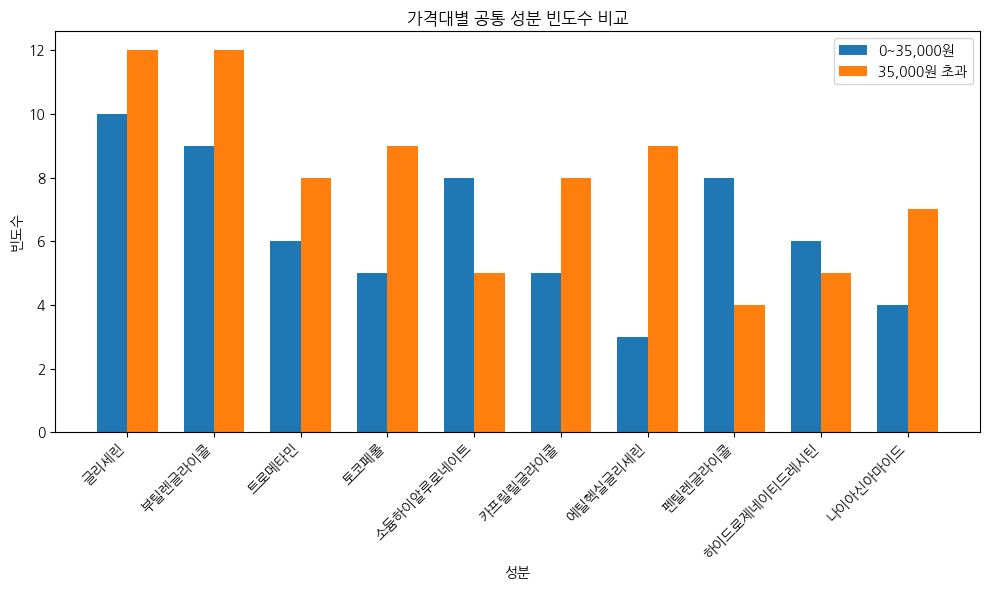

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 가정: common DataFrame이 이미 생성되어 있고, 각 성분의 빈도수를 포함하고 있다고 가정합니다.
# common = pd.merge(lotion_dry_skin_0_to_35000, lotion_dry_skin_up_to_35000, on='성분', how='inner', suffixes=('_0_to_35000', '_up_to_35000'))

N = 10  # 상위 10개 성분

# 상위 N개의 공통 성분을 선택합니다. 빈도수 기준으로 정렬이 필요할 수 있습니다.
# 이 예에서는 두 가격대의 빈도수 합을 기준으로 상위 N개 성분을 선택합니다.
common['빈도수_합'] = common['빈도_0_to_35000'] + common['빈도_up_to_35000']
top_common = common.sort_values(by='빈도수_합', ascending=False).head(N)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(N)

bars1 = ax.bar(index, top_common['빈도_0_to_35000'], bar_width, label='0~35,000원')
bars2 = ax.bar(index + bar_width, top_common['빈도_up_to_35000'], bar_width, label='35,000원 초과')

ax.set_xlabel('성분')
ax.set_ylabel('빈도수')
ax.set_title('가격대별 공통 성분 빈도수 비교')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_common['성분'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


 - 간단하게 비교해 본 결과 겨격에 따른 성분차이가 존제 하지만 해당 성분들이 보두 수분감 또는 건성 피부에 영향을 주는 성분인지 확싫지 않다


- 가격과 상관 없이 건성에 좋음 리뷰 값으로만 비교

In [21]:
lotion_dry_skin_up_to_25 = frequent_ingredients(lotion_df,'건성',10,(25,float('inf')))

lotion_dry_skin_up_to_25

조건을 만족하는 제품의 수: 114


,성분,빈도
0,글리세린,118
1,부틸렌글라이콜,107
2,에틸헥실글리세린,79
3,나이아신아마이드,74
4,소듐하이알루로네이트,65
...,...,...
71,글리세릴스테아레이트에스이,12
72,스페인감초뿌리추출물,12
73,보리추출물,12
74,사이클로헥사실록세인,12


In [22]:
lotion_dry_skin_0_to_25 = frequent_ingredients(lotion_df,'건성',10,(0,25))

lotion_dry_skin_0_to_25

조건을 만족하는 제품의 수: 116


,성분,빈도
0,글리세린,110
1,부틸렌글라이콜,102
2,나이아신아마이드,77
3,소듐하이알루로네이트,71
4,에틸헥실글리세린,70
...,...,...
63,스페인감초뿌리추출물,12
64,콜레스테롤,12
65,카페인,12
66,에리스리톨,12


In [40]:
# 두 데이터 프레임의 차이점 확인
common = pd.merge(lotion_dry_skin_0_to_25, lotion_dry_skin_up_to_25, on='성분', how='inner', suffixes=('_0_to_25', '_up_to_25'))
unique_to_0_to_25 = pd.merge(lotion_dry_skin_0_to_25, lotion_dry_skin_up_to_25, on='성분', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
unique_to_up_to_25 = pd.merge(lotion_dry_skin_0_to_25, lotion_dry_skin_up_to_25, on='성분', how='right', indicator=True).query('_merge == "right_only"').drop('_merge', axis=1)

common

,성분,빈도_0_to_25,빈도_up_to_25
0,글리세린,110,118
1,부틸렌글라이콜,102,107
2,나이아신아마이드,77,74
3,소듐하이알루로네이트,71,65
4,에틸헥실글리세린,70,79
5,하이드로제네이티드레시틴,67,64
6,아데노신,62,60
7,트로메타민,58,55
8,판테놀,50,57
9,잔탄검,49,56


In [24]:
unique_to_0_to_25 = pd.merge(lotion_dry_skin_0_to_25, lotion_dry_skin_up_to_25, on='성분', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
unique_to_up_to_25 = pd.merge(lotion_dry_skin_0_to_25, lotion_dry_skin_up_to_25, on='성분', how='right', indicator=True).query('_merge == "right_only"').drop('_merge', axis=1)


In [25]:
unique_to_0_to_25

,성분,빈도_x,빈도_y
28,아시아티코사이드,23,NaN
33,아시아틱애씨드,21,NaN
34,마데카식애씨드,21,NaN
36,카프릴릴메티콘,19,NaN
38,디소듐이디티에이,18,NaN
43,글루코노락톤,16,NaN
47,다시마추출물,15,NaN
54,하이드록시아세토페논,13,NaN
55,트라이소듐이디티에이,13,NaN
56,쇠비름추출물,13,NaN


In [202]:
unique_to_up_to_25

,성분,빈도_x,빈도_y
33,글리세릴스테아레이트시트레이트,NaN,24
40,글리세릴카프릴레이트,NaN,20
47,폴리글리세릴-3다이스테아레이트,NaN,17
48,세틸에틸헥사노에이트,NaN,17
51,비닐다이메티콘,NaN,16
52,하이드록시프로필트라이모늄하이알루로네이트,NaN,16
53,피이지-100스테아레이트,NaN,15
54,C14-22알코올,NaN,15
56,폴리글리세릴-3메틸글루코오스다이스테아레이트,NaN,14
57,C12-20알킬글루코사이드,NaN,14


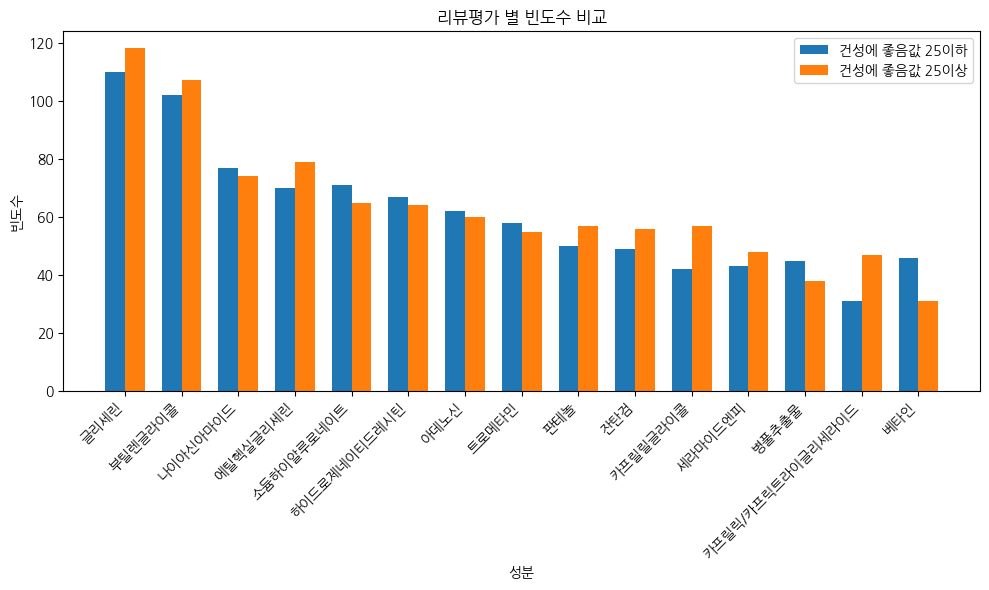

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 가정: common DataFrame이 이미 생성되어 있고, 각 성분의 빈도수를 포함하고 있다고 가정합니다.

N = 15  # 상위 15개 성분

# common에서 두 가격대의 빈도수 합을 기준으로 상위 N개 성분을 선택합니다.
# 빈도수 합을 계산하고, 상위 N개 성분을 추출합니다.
common['빈도수_합'] = common['빈도_0_to_25'] + common['빈도_up_to_25']
top_common = common.sort_values(by='빈도수_합', ascending=False).head(N)

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(N)

# 두 가격대에서의 빈도수를 비교하기 위한 바 차트를 생성합니다.
bars1 = ax.bar(index, top_common['빈도_0_to_25'], bar_width, label='건성에 좋음값 25이하')
bars2 = ax.bar(index + bar_width, top_common['빈도_up_to_25'], bar_width, label='건성에 좋음값 25이상')

ax.set_xlabel('성분')
ax.set_ylabel('빈도수')
ax.set_title('리뷰평가 별 빈도수 비교')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_common['성분'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()



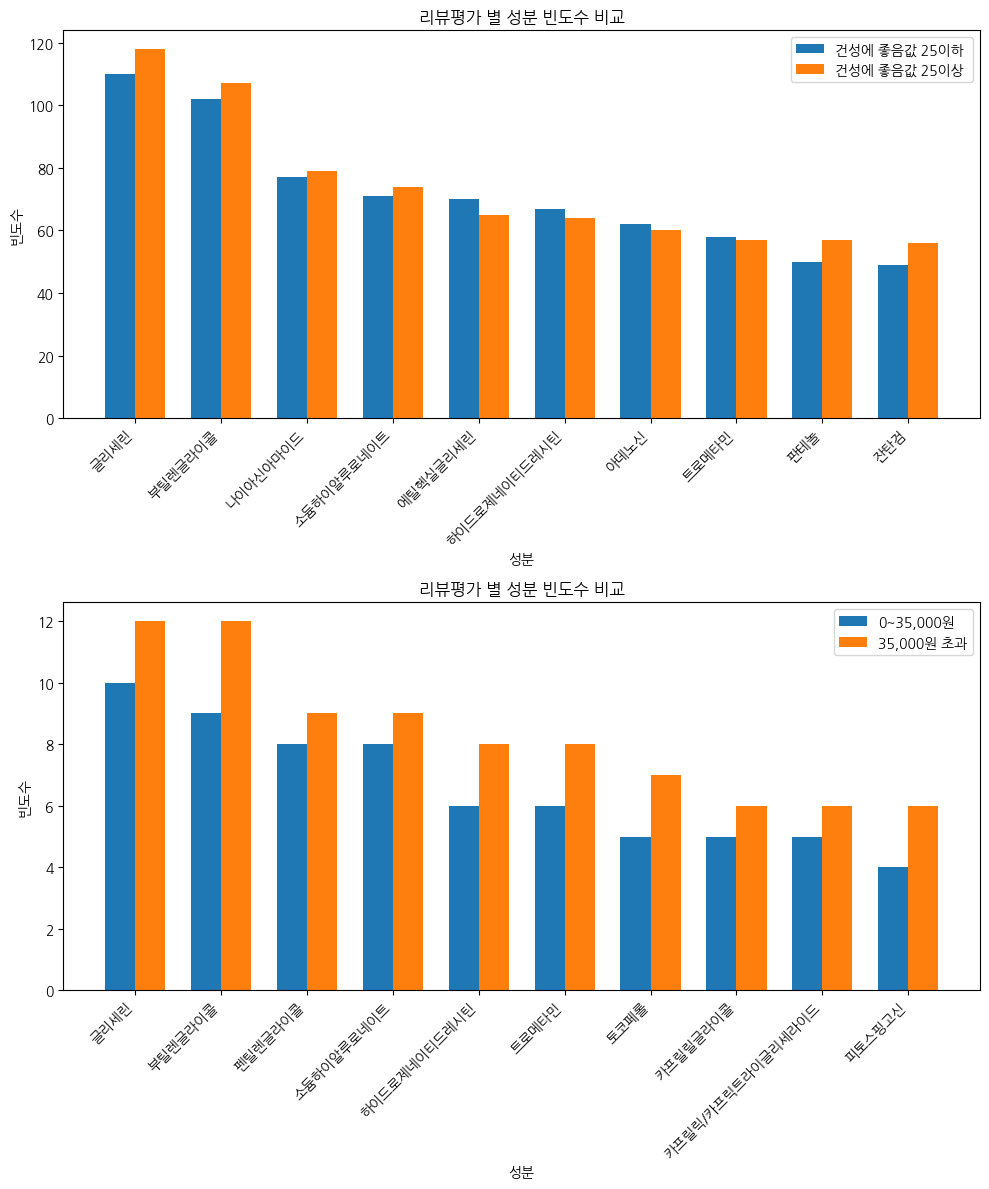

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 상위 N개 성분
N = 10
top_0_to_25 = lotion_dry_skin_0_to_25.head(N)
top_up_to_25 = lotion_dry_skin_up_to_25.head(N)

N2 = 10
top_0_to_35000 = lotion_dry_skin_0_to_35000.head(N2)
top_up_to_35000 = lotion_dry_skin_up_to_35000.head(N2)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2행 1열의 그래프 생성

# 첫 번째 그래프
bar_width = 0.35
index = np.arange(N)

axs[0].bar(index, top_0_to_25['빈도'], bar_width, label='건성에 좋음값 25이하')
axs[0].bar(index + bar_width, top_up_to_25['빈도'], bar_width, label='건성에 좋음값 25이상 ')

axs[0].set_xlabel('성분')
axs[0].set_ylabel('빈도수')
axs[0].set_title('리뷰평가 별 성분 빈도수 비교')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(top_0_to_25['성분'], rotation=45, ha='right')
axs[0].legend()

# 두 번째 그래프
index2 = np.arange(N2)

axs[1].bar(index2, top_0_to_35000['빈도'], bar_width, label='0~35,000원')
axs[1].bar(index2 + bar_width, top_up_to_35000['빈도'], bar_width, label='35,000원 초과')

axs[1].set_xlabel('성분')
axs[1].set_ylabel('빈도수')
axs[1].set_title('리뷰평가 별 성분 빈도수 비교')
axs[1].set_xticks(index2 + bar_width / 2)
axs[1].set_xticklabels(top_0_to_35000['성분'], rotation=45, ha='right')
axs[1].legend()

plt.tight_layout()
plt.show()


- 분석해 본 결과 글리세린과 부틸렌글라이클, 소듐하이알루로네이트, 하이드로제네이티드레시틴, 성분이 빈도수가 높은 모습을 볼수 있었다 . 


In [206]:
# 모든 성분을 포함하는 데이터만 필터링
filtered_all_df = lotion_df[
    lotion_df['성분'].str.contains("글리세린") &
    lotion_df['성분'].str.contains("부틸렌글라이콜") &
    lotion_df['성분'].str.contains("소듐하이알루로네이트") &
    lotion_df['성분'].str.contains("하이드로제네이티드레시틴")
]

filtered_all_df

,브랜드명,제품명,원가,세일가,평점 갯수,평점,건성,복합성,지성,보습,진정,주름/미백,자극x,보통,자극O,성분
1,아이디얼포맨,아이디얼 포 맨 프레시 올인원 기획,28000,22400,1416,4.8,14,33,53,52,48,0,71,29,0,"정제수,메틸프로판다이올,다이프로필렌글라이콜,1,2-헥산다이올,나이아신아마이드,아이소..."
2,닥터지,닥터지 레드 블레미쉬 포 맨 올인원,29700,26600,1584,4.8,28,60,13,51,47,2,75,25,0,"정제수,프로판다이올,부틸렌글라이콜다이카프릴레이트/다이카프레이트,메틸프로판다이올,트라..."
3,아누아,아누아 어성초 70 데일리 로션 200ml,28000,21900,839,4.8,22,62,16,41,59,1,75,23,2,"약모밀추출물,글리세린,1,2-헥산다이올,메틸트라이메티콘,에틸헥실스테아레이트,부틸렌글..."
12,닥터지,닥터지 레드 블레미쉬 포 맨 올인원 플루이드 150ml+150ml+워시30ml,32000,28500,1646,4.9,22,59,20,52,43,5,70,26,4,"정제수,나이아신아마이드,아이소도데케인,카프릴릴메티콘,메틸프로판다이올,1,2-헥산다이..."
18,무슈제이,무슈제이 베이직 아쿠아 보습 올인원 1+1 기획,24900,23900,568,4.8,22,65,13,58,40,3,62,38,1,"정제수,부틸렌글라이콜,글리세린,나이아신아마이드,부틸렌글라이콜다이카프릴레이트/다이카프..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,스케다,스케다 스킨 브라이트 올인원 135ml,22000,15000,7,4.6,43,29,29,86,0,14,86,14,0,"정제수,글리세린,에탄올,부틸렌글라이콜,사이클로펜타실록세인,나이아신아마이드,베타인,1..."
217,비알티씨,BRTC 파워 옴므 올인원 솔루션 200ml,28000,22400,2333,4.9,17,68,15,63,29,8,82,18,1,"정제수,부틸렌글라이콜,글리세린,에탄올,나이아신아마이드,비스-피이지-18메칠에텔디메칠..."
218,블랙몬스터,블랙몬스터 화이트 올인원 더블세럼 150ml,29000,26400,66,4.8,28,58,14,44,25,31,70,30,0,"""수분세럼:유칼립투스잎추출물,정제수,부틸렌글라이콜,프로판다이올,에탄올,글리세린,1,..."
219,비알티씨,BRTC 파워 옴므 올인원 솔루션 더블 기획,50400,40320,2333,4.9,18,61,21,61,33,6,65,33,2,"정제수,부틸렌글라이콜,글리세린,에탄올,나이아신아마이드,비스-피이지-18메칠에텔디메칠..."


- 글리세린과 부틸렌글라이클, 소듐하이알루로네이트, 하이드로제네이티드레시틴, 성분이 모두 포함되어 있는 로션 제품의 평균 가격과 평점 계산 

In [207]:
average_price = filtered_all_df['원가'].mean()
average_rating = filtered_all_df['평점'].mean()

average_price, average_rating

(30921.53846153846, 4.8076923076923075)

- 하지만 성분의 종류가 많고 해당 빈도수가 높게 나온 성분들이 실제로 화장품의 기능과 관련이 있는지 정확하지 않기 때문에 
- 정확한 성분 분석을 위해 '글로우픽' 웹페이지에서 제품을 검색해 제품의 성분의 위험도와 기능등에 대한 정보를 크롤링 해봄

In [40]:
import mysql.connector 
import selenium
from bs4 import BeautifulSoup
import pandas as pd 
from urllib.request import urlopen
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome import options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from urllib import parse
import re
import numpy as np
import pandas as pd
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [128]:
options = webdriver.ChromeOptions()

url = "https://www.glowpick.com/?tab=recommends&cast-main-cate=-2147483648"
driver=webdriver.Chrome(service=Service("/Users/hong-gwonho/Documents/dev_ws/EDA/driver/chromedriver-mac-arm64/chromedriver"),options=options)

driver.get(url)
driver.maximize_window()

In [114]:
driver.close()

In [105]:
WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')   
popup=driver.find_element(By.CLASS_NAME,"popup__container__buttons.buttons")
not_today = popup.find_element(By.CLASS_NAME, "buttons__button.buttons__not-today")

not_today.click()

In [106]:
search =driver.find_element(By.CLASS_NAME,"glowpick-header.glix-header.headers")
search_butn = search .find_element(By.CLASS_NAME,"header__to-search")

search_butn.click()


In [107]:
search_area = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME,"header.header--hidden")))

text_area = search_area.find_element(By.CLASS_NAME,"header__input.copyable")

text_area.send_keys('아누아 어성초 70 데일리 로션 200ml')
text_area.send_keys(Keys.ENTER)


In [108]:
WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')   
product = driver.find_element(By.CLASS_NAME,"review__product")
product.click()

In [109]:
WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')   
ingredient = driver.find_element(By.CLASS_NAME,"info__article.ingredient") 
driver.execute_script("arguments[0].scrollIntoView(true);", ingredient)

show_ingredient = WebDriverWait(ingredient, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME,"info__article__h3__button")))

show_ingredient.click()

In [110]:
ingredient_list = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME,"ingredient__list")))

ingredient_info= ingredient_list.find_elements(By.CLASS_NAME,"item__wrapper__text__kor")
ingredient_dangerousness = ingredient_list.find_elements(By.CLASS_NAME,"tag__label") 
ingredient_function = ingredient_list.find_elements(By.CLASS_NAME,"item__wrapper__text__desc") 



In [95]:
dangerousness_list = []
info_list = []
function_list = [] 

In [96]:
for idx , dangerousness in enumerate(ingredient_dangerousness):
    text = dangerousness.get_attribute("textContent")
    # \s는 모든 공백 문자(스페이스, 탭, 줄바꿈 등)를 매치합니다.
    cleaned_text = re.sub(r'\s+', '', text)
    cleaned_text=re.sub(r'[A-Za-z]', '', cleaned_text)
    dangerousness_list.append(cleaned_text)
    print(cleaned_text)


for idx , info in enumerate(ingredient_info):
    text = info.get_attribute("textContent")
    # \s는 모든 공백 문자(스페이스, 탭, 줄바꿈 등)를 매치합니다.
    cleaned_text = re.sub(r'\s+', '', text)
    cleaned_text=re.sub(r'[A-Za-z]', '', cleaned_text)
    info_list.append(cleaned_text)
    print(cleaned_text)
    

    
for idx , function in enumerate(ingredient_function):
    text = function.get_attribute("textContent")
    # \s는 모든 공백 문자(스페이스, 탭, 줄바꿈 등)를 매치합니다.
    cleaned_text = re.sub(r'\s+', '', text)
    cleaned_text=re.sub(r'[A-Za-z]', '', cleaned_text)
    function_list.append(cleaned_text)
    print(cleaned_text)
    

1-2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
약모밀추출물
글리세린
카프릴릭/카프릭트라이글리세라이드
세테아릴알코올
부틸렌글라이콜
1,2-헥산다이올
식물성스쿠알란
다시마추출물
한련초잎추출물
병풀추출물
무화과추출물
당느릅나무껍질추출물
줄맨드라미씨추출물
하이드로제네이티드레시틴
소듐하이알루로네이트
글리세릴스테아레이트
세테아릴글루코사이드
정제수
소듐스테아로일글루타메이트
카보머
시어버터
알지닌
프룩토올리고사카라이드
베타-글루칸
글루코오스
하이드롤라이즈드하이알루로닉애씨드
세라마이드엔피
소듐아세틸레이티드하이알루로네이트
에틸헥실글리세린
피부컨디셔닝제(기타)
변성제,착향제,헤어컨디셔닝제,보습제,피부보호제,피부컨디셔닝제(보습제),점도감소제
착향제,피부컨디셔닝제(수분차단제),용제
유화안정제,불투명화제,계면활성제-거품형성제,점증제-수용성,점증제-비수용성
착향제,피부컨디셔닝제,용제,점도감소제
용제

착향제
피부컨디셔닝제(기타)
피부컨디셔닝제
피부컨디셔닝제
피부컨디셔닝제(기타)
피부컨디셔닝제(기타)
계면활성제-유화제,현탁화제-비계면활성제,피부컨디셔닝제
피부컨디셔닝제
착향제,피부컨디셔닝제(유연제),계면활성제(유화제)
계면활성제-유화제
피부컨디셔닝제,용제
모발컨디셔닝제,피부컨디셔닝제,계면활성제-세정제
유화안정제,점증제-수용성
피부컨디셔닝제(기타),피부컨디셔닝제(수분차단제),점도증가제(비수성)
착향제,헤어컨디셔닝제,피부컨디셔닝제
피부컨디셔닝제(보습제)
벌킹제,피부컨디셔닝제
감미제,보습제,피부컨디셔닝제(보습제),피부컨디셔닝제(기타)
헤어컨디셔닝제,피부컨디셔닝제(보습제)
헤어컨디셔닝제,피부컨디셔닝제(기타)
보습제
피부컨디셔닝제(기타)


In [111]:
exit_butn = driver.find_element(By.CLASS_NAME,"icon.x-black")
exit_butn.click()

In [112]:

search_again = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME,"header__to-search.type-search__icon.header__search")))

search_again.click()
WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')   
search_area = driver.find_element(By.CLASS_NAME,"header.header--hidden")
text_area =  WebDriverWait(search_area, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME,"header__input.copyable")))

delete_text = WebDriverWait(search_area, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME,"icon.search-cancle")))

delete_text.click()
text_area.send_keys('닥터지 레드 블레미쉬 포 맨 올인원')
text_area.send_keys(Keys.ENTER)

- 1개 제품에 대해서 크롤링한 결과 이전 데이터 보다 성분 데이터로서 활용도가 높을 것 같다는 생각이 들어 전체 제품에 대해 크롤링을 시도 

In [68]:
# 각 리스트의 요소를 조합하여 새로운 리스트 생성
lotion_ingredient_info = list(zip(dangerousness_list, info_list, function_list))

lotion_ingredient_info


[('1-2', '약모밀추출물', '피부컨디셔닝제(기타)'),
 ('1', '글리세린', '변성제,착향제,헤어컨디셔닝제,보습제,피부보호제,피부컨디셔닝제(보습제),점도감소제'),
 ('1', '카프릴릭/카프릭트라이글리세라이드', '착향제,피부컨디셔닝제(수분차단제),용제'),
 ('1', '세테아릴알코올', '유화안정제,불투명화제,계면활성제-거품형성제,점증제-수용성,점증제-비수용성'),
 ('1', '부틸렌글라이콜', '착향제,피부컨디셔닝제,용제,점도감소제'),
 ('1', '1,2-헥산다이올', '용제'),
 ('1', '식물성스쿠알란', ''),
 ('1', '다시마추출물', '착향제'),
 ('1', '한련초잎추출물', '피부컨디셔닝제(기타)'),
 ('1', '병풀추출물', '피부컨디셔닝제'),
 ('1', '무화과추출물', '피부컨디셔닝제'),
 ('2', '당느릅나무껍질추출물', '피부컨디셔닝제(기타)'),
 ('1', '줄맨드라미씨추출물', '피부컨디셔닝제(기타)'),
 ('1', '하이드로제네이티드레시틴', '계면활성제-유화제,현탁화제-비계면활성제,피부컨디셔닝제'),
 ('1', '소듐하이알루로네이트', '피부컨디셔닝제'),
 ('1', '글리세릴스테아레이트', '착향제,피부컨디셔닝제(유연제),계면활성제(유화제)'),
 ('1', '세테아릴글루코사이드', '계면활성제-유화제'),
 ('1', '정제수', '피부컨디셔닝제,용제'),
 ('1', '소듐스테아로일글루타메이트', '모발컨디셔닝제,피부컨디셔닝제,계면활성제-세정제'),
 ('1', '카보머', '유화안정제,점증제-수용성'),
 ('1', '시어버터', '피부컨디셔닝제(기타),피부컨디셔닝제(수분차단제),점도증가제(비수성)'),
 ('1', '알지닌', '착향제,헤어컨디셔닝제,피부컨디셔닝제'),
 ('1', '프룩토올리고사카라이드', '피부컨디셔닝제(보습제)'),
 ('1', '베타-글루칸', '벌킹제,피부컨디셔닝제'),
 ('1', '글루코오스', '감미제,보습제,피부컨디셔닝제(보습제),피부컨디

In [72]:
lotion_ingredient_info_df = pd.DataFrame(lotion_ingredient_info, columns=['위험도', '성분', '기능'])

lotion_ingredient_info_df

,위험도,성분,기능
0,1-2,약모밀추출물,피부컨디셔닝제(기타)
1,1,글리세린,"변성제,착향제,헤어컨디셔닝제,보습제,피부보호제,피부컨디셔닝제(보습제),점도감소제"
2,1,카프릴릭/카프릭트라이글리세라이드,"착향제,피부컨디셔닝제(수분차단제),용제"
3,1,세테아릴알코올,"유화안정제,불투명화제,계면활성제-거품형성제,점증제-수용성,점증제-비수용성"
4,1,부틸렌글라이콜,"착향제,피부컨디셔닝제,용제,점도감소제"
5,1,"1,2-헥산다이올",용제
6,1,식물성스쿠알란,
7,1,다시마추출물,착향제
8,1,한련초잎추출물,피부컨디셔닝제(기타)
9,1,병풀추출물,피부컨디셔닝제


In [152]:
# lotion_ingredient_info_df 데이터 프레임을 CSV 파일로 저장
lotion_ingredient_info_df.to_csv("lotion_ingredient_info.csv", index=False,encoding='utf-8-sig')



In [71]:
a = frequent_ingredients(lotion_df,'복합성',50,10)

a

조건을 만족하는 제품의 수: 175


,성분,빈도
0,글리세린,179
1,부틸렌글라이콜,154
2,나이아신아마이드,116
3,에틸헥실글리세린,108
4,소듐하이알루로네이트,100
...,...,...
63,다시마추출물,18
64,쇠비름추출물,18
65,글루코노락톤,18
66,프룩토올리고사카라이드,18


In [77]:
enhanced_df = pd.merge(a, lotion_ingredient_info_df, on='성분', how='left')

# 결과 출력
enhanced_df

,성분,빈도,위험도,기능
0,글리세린,179,1,"변성제,착향제,헤어컨디셔닝제,보습제,피부보호제,피부컨디셔닝제(보습제),점도감소제"
1,부틸렌글라이콜,154,1,"착향제,피부컨디셔닝제,용제,점도감소제"
2,나이아신아마이드,116,NaN,NaN
3,에틸헥실글리세린,108,NaN,NaN
4,소듐하이알루로네이트,100,1,피부컨디셔닝제
...,...,...,...,...
63,다시마추출물,18,1,착향제
64,쇠비름추출물,18,NaN,NaN
65,글루코노락톤,18,NaN,NaN
66,프룩토올리고사카라이드,18,1,피부컨디셔닝제(보습제)


In [143]:
lotion_df['제품명']

0            아이디얼 포 맨 퍼펙트 올인원 어워즈 한정 기획
1                   아이디얼 포 맨 프레시 올인원 기획
2                  닥터지 레드 블레미쉬 포 맨 올인원 
3               아누아 어성초 70 데일리 로션 200ml
4             라운드랩 1025 독도 로션 400ml 대용량
                     ...               
216    리우젤 하이드 레이팅 페이스 모이스처 라이저 3.38oz 
217            BRTC 파워 옴므 올인원 솔루션 200ml
218            블랙몬스터 화이트 올인원 더블세럼 150ml
219            BRTC 파워 옴므 올인원 솔루션 더블 기획
220    닥터방기원 시카마이드 딥 모이스처 밸런싱 올인원 300ml
Name: 제품명, Length: 221, dtype: object

- 전체 제품에 대한 검색을 수행하고 성분 정보를 크롤링 하는 과정 

In [129]:
WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')   
popup=driver.find_element(By.CLASS_NAME,"popup__container__buttons.buttons")
not_today = popup.find_element(By.CLASS_NAME, "buttons__button.buttons__not-today")

not_today.click()


In [140]:
import time
product_ingredient_lsit = []
num= 0
for name in product_names_list:
    dangerousness_list = []
    info_list = []
    function_list = [] 

    if num ==0: 
        search =driver.find_element(By.CLASS_NAME,"glowpick-header.glix-header.headers")
        search_butn = WebDriverWait(search, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"header__to-search")))
        
        search_butn.click()
        search_area = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"header.header--hidden")))

        text_area =  WebDriverWait(search_area, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"header__input.copyable")))


        text_area.send_keys(name)
        text_area.send_keys(Keys.ENTER)
        num=1
        
    else:
        
        WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')   
        search_area = driver.find_element(By.CLASS_NAME,"header.header--hidden")
        text_area =  WebDriverWait(search_area, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"header__input.copyable")))

        delete_text = WebDriverWait(search_area, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"icon.search-cancle")))

        delete_text.click()
        text_area.send_keys(name)
        text_area.send_keys(Keys.ENTER)
                

    WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')   
    product = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"review__product")))

    product.click()

    WebDriverWait(driver, 60).until(lambda d: d.execute_script('return document.readyState') == 'complete')  
     
    ingredient =  WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"info__article.ingredient")))
    
    driver.execute_script("arguments[0].scrollIntoView(true);", ingredient)

    show_ingredient = WebDriverWait(ingredient, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"info__article__h3__button")))
    
    time.sleep(0.5)

    show_ingredient.click()

    ingredient_list = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"ingredient__list")))

    ingredient_info= ingredient_list.find_elements(By.CLASS_NAME,"item__wrapper__text__kor")
    ingredient_dangerousness = ingredient_list.find_elements(By.CLASS_NAME,"tag__label") 
    ingredient_function = ingredient_list.find_elements(By.CLASS_NAME,"item__wrapper__text__desc") 

    for idx , dangerousness in enumerate(ingredient_dangerousness):
        text = dangerousness.get_attribute("textContent")
        # \s는 모든 공백 문자(스페이스, 탭, 줄바꿈 등)를 매치합니다.
        cleaned_text = re.sub(r'\s+', '', text)
        cleaned_text=re.sub(r'[A-Za-z]', '', cleaned_text)
        dangerousness_list.append(cleaned_text)
     


    for idx , info in enumerate(ingredient_info):
        text = info.get_attribute("textContent")
        # \s는 모든 공백 문자(스페이스, 탭, 줄바꿈 등)를 매치합니다.
        cleaned_text = re.sub(r'\s+', '', text)
        cleaned_text=re.sub(r'[A-Za-z]', '', cleaned_text)
        info_list.append(cleaned_text)

    

    
    for idx , function in enumerate(ingredient_function):
        text = function.get_attribute("textContent")
        # \s는 모든 공백 문자(스페이스, 탭, 줄바꿈 등)를 매치합니다.
        cleaned_text = re.sub(r'\s+', '', text)
        cleaned_text=re.sub(r'[A-Za-z]', '', cleaned_text)
        function_list.append(cleaned_text)
        
        
    exit_butn = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME,"icon.x-black")))
    exit_butn.click()
        
        
    
    search_again = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CLASS_NAME,"header__to-search.type-search__icon.header__search")))
        
    # 각 리스트의 요소를 조합하여 새로운 리스트 생성
    lotion_ingredient_info = list(zip(dangerousness_list, info_list, function_list))

    product_ingredient_lsit.append(name)
    product_ingredient_lsit.append( lotion_ingredient_info)
    lotion_ingredient_info
        
        

    search_again.click()
    

TimeoutException: Message: 
Stacktrace:
0   chromedriver                        0x0000000100d2c53c chromedriver + 3966268
1   chromedriver                        0x0000000100d24ac8 chromedriver + 3934920
2   chromedriver                        0x00000001009a7da0 chromedriver + 277920
3   chromedriver                        0x00000001009ea394 chromedriver + 549780
4   chromedriver                        0x0000000100a22bf0 chromedriver + 781296
5   chromedriver                        0x00000001009defb0 chromedriver + 503728
6   chromedriver                        0x00000001009dfa28 chromedriver + 506408
7   chromedriver                        0x0000000100cf1724 chromedriver + 3725092
8   chromedriver                        0x0000000100cf5c18 chromedriver + 3742744
9   chromedriver                        0x0000000100cda20c chromedriver + 3629580
10  chromedriver                        0x0000000100cf6714 chromedriver + 3745556
11  chromedriver                        0x0000000100ccd584 chromedriver + 3577220
12  chromedriver                        0x0000000100d14f74 chromedriver + 3870580
13  chromedriver                        0x0000000100d15118 chromedriver + 3871000
14  chromedriver                        0x0000000100d24738 chromedriver + 3934008
15  libsystem_pthread.dylib             0x00000001844a6034 _pthread_start + 136
16  libsystem_pthread.dylib             0x00000001844a0e3c thread_start + 8


- 크롤링 결과 올리브영 페이지의 상품중 상당수가 증정, 기획, 이벤트 중인 상품이 많아 제품명이 정확하게 제품명인 경우가 아닌 경우 검색이 되지 않음을 확인 했다 .

In [161]:
lotion_ingredient_info

[('1', '정제수', '피부컨디셔닝제,용제'),
 ('1', '부틸렌글라이콜', '착향제,피부컨디셔닝제,용제,점도감소제'),
 ('1-2', '글리세린', '변성제,착향제,헤어컨디셔닝제,보습제,피부보호제,피부컨디셔닝제(보습제),점도감소제'),
 ('1', '1,2-헥산다이올', '용제'),
 ('1', '나이아신아마이드', '헤어컨디셔닝제,피부컨디셔닝제(기타)'),
 ('1', '아이소도데케인', '착향제,용제'),
 ('1', '카프릴릭/카프릭트라이글리세라이드', '착향제,피부컨디셔닝제(수분차단제),용제'),
 ('1', '해수', '보습제,피부컨디셔닝제(보습제),용제'),
 ('1', '베타인', '모발컨디셔닝제,보습제,피부보습제'),
 ('1', '옥틸도데세스-16', '계면활성제-유화제'),
 ('1', '하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸타우레이트코폴리머', '유화안정제,점도증가제(수성)'),
 ('1', '카보머', '유화안정제,점증제-수용성'),
 ('2', '트로메타민', '착향제,조절제'),
 ('1', '솔비탄아이소스테아레이트', '계면활성제(유화제)'),
 ('1', '아데노신', '피부컨디셔닝제,주름개선(기능성화장품)'),
 ('1', '알란토인', '피부컨디셔닝제,피부보호제'),
 ('1', '치자추출물', '피부컨디셔닝제'),
 ('1', '달맞이꽃꽃추출물', '수렴제'),
 ('2', '대왕소나무잎추출물', '피부컨디셔닝제(기타)'),
 ('1', '당느릅나무뿌리추출물', '피부컨디셔닝제(기타)'),
 ('1', '칡뿌리추출물', '피부컨디셔닝제(보습제)'),
 ('1', '말토덱스트린', '흡수제,결합제,유화안정제,피막형성제,모발컨디셔닝제,피부컨디셔닝제,현탁화제(비계면활성)'),
 ('1', '병풀추출물', '피부컨디셔닝제'),
 ('1', '판테놀', '헤어컨디셔닝제,용제,피부컨디셔닝제(보습제)'),
 ('1', '잔탄검', '결합제,유화안정제,피부컨디셔닝제,계면활성제-유화제,점증제-수용성'),
 ('1', '캐모마

In [162]:
print(len(lotion_ingredient_info))

40
